# Importing Necessary Libraries

In [64]:
import os
import cv2
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers import Input
from keras.preprocessing.image import ImageDataGenerator
from keras import applications

# Data Visualization

In [65]:
trainset_path = '/Users/tung/Downloads/Landmark_Classification/train'
testset_path = '/Users/tung/Downloads/Landmark_Classification/test'

train = list(os.walk(trainset_path)) #gives the list of all directories and subdirectories

In [66]:
label_names = train[0][1]
dict_labels = dict(zip(label_names, list(range(len(label_names)))))
number_landmark_classes = len(dict_labels.keys())

print(dict_labels)

{'suoi_tien_tphcm': 0, 'cau_nhat_tan': 1, 'lang_khai_dinh': 2, 'van_mieu': 3, 'mui_ke_ga_phanthiet': 4, 'buu_dien_trung_tam_tphcm': 5, 'mui_ca_mau': 6, 'quang_truong_lam_vien': 7, 'chua_thien_mu': 8, 'thap_rua': 9, 'cot_co': 10, 'chua_cau': 11, 'hoang_thanh': 12, 'hon_chong_nhatrang': 13, 'bao_tang_ha_noi': 14, 'tuong_chua_kito_vungtau': 15, 'ubnd_tphcm': 16, 'cau_long_bien': 17, 'nha_hat_lon_tphcm': 18, 'nha_hat_lon_hanoi': 19, 'chua_mot_cot': 20, 'toa_nha_bitexco_tphcm': 21, 'cho_ben_thanh_tphcm': 22, 'thap_cham': 23, 'thac_ban_gioc': 24, 'cau_rong': 25, 'lang_bac': 26, 'landmark81': 27, 'nha_tho_lon_ha_noi': 28, 'nha_tho_da_co_sapa': 29}


The next function takes in the outermost directory and returns np array of the images contained in each subdirectory along with their labels

In [67]:
def dataset(path): #put path till the highest directory level
    images = []
    labels = []
    for folder in tqdm(os.listdir(path)):
        value_of_label = dict_labels[folder] #dict_labels is the dictionary whose key:value pairs are classes:numbers representing them

        for file in (os.listdir(os.path.join(path, folder))):
            path_of_file = os.path.join(os.path.join(path, folder), file)

            image = cv2.imread(path_of_file)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(value_of_label)

    images = np.array(images, dtype = 'float32')/255.0
    labels = np.array(labels)

    return images, labels

In [68]:
images, labels = dataset(trainset_path)
images, labels = shuffle(images, labels)

  3%|█████▌                                                                                                                                                                | 1/30 [00:00<00:19,  1.46it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
  7%|███████████                                                                                                                                                           | 2/30 [00:01<00:26,  1.07it/s]libpng warning: iCCP: known incorre

In [69]:
images.shape

(1500, 150, 150, 3)

## Shows the number of images of each landmark classes

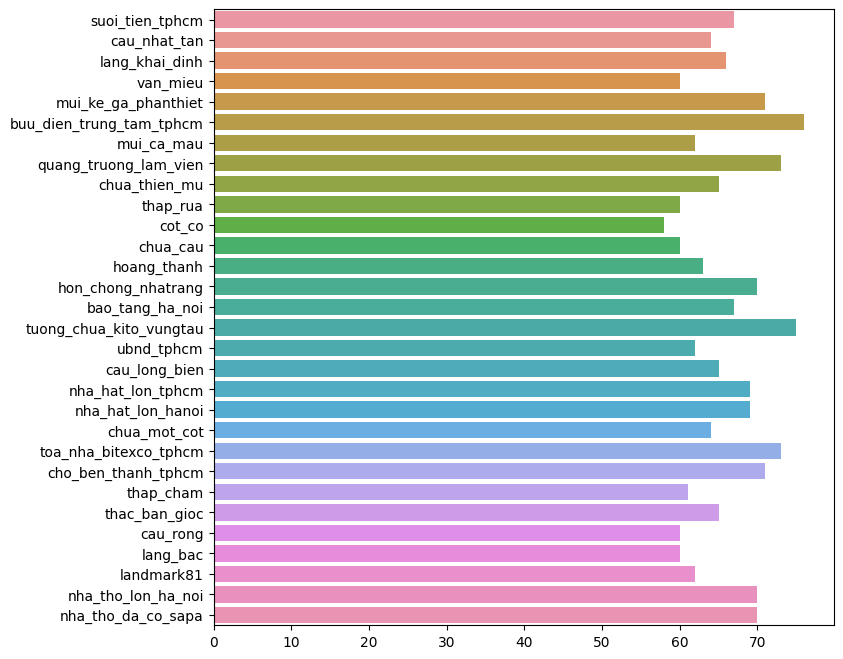

In [70]:
landmark_classes = train[0][1]

no_of_landmarkes = []
for _ in range(1, number_landmark_classes + 1):
    no_of_landmarkes.append(len(train[_][0]))
plt.figure(figsize = (8, 8))
sns.barplot(y = landmark_classes, x = no_of_landmarkes);

## Show some sample images

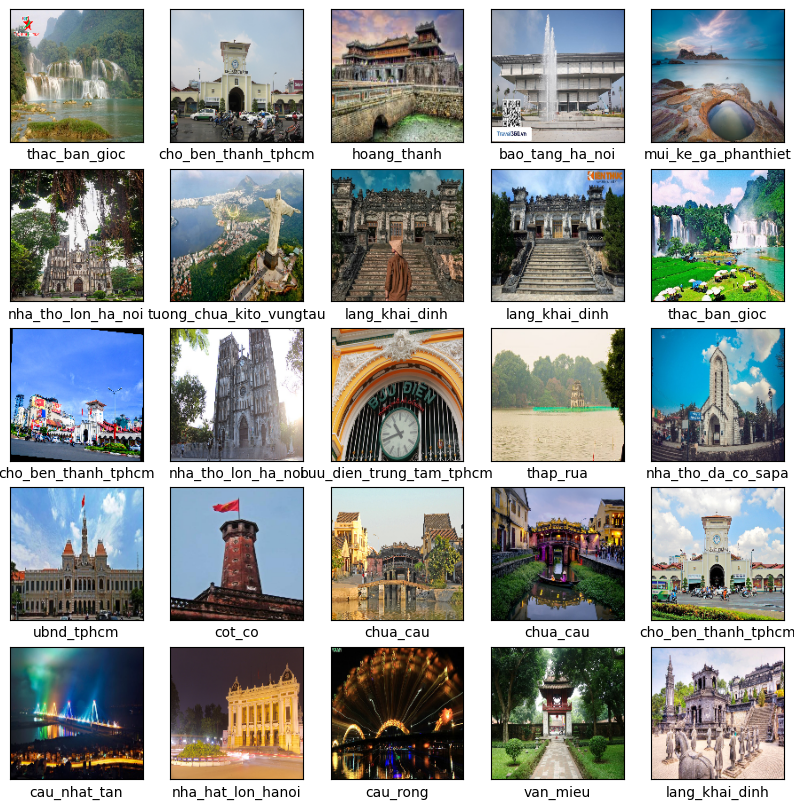

In [71]:
plt.figure(figsize = (10,10))
for _ in range(25):
    plt.subplot(5, 5, _+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    data = images[_]
    plt.xlabel(label_names[labels[_]])
    plt.imshow(data);

# Load images using ImageDatagenerator

Use ImageDatagenerator to allow we add some other image augmentations. It help a lot in case our's dataset small.

In [72]:
image_size = (224, 224)
batch_size = 64
train_datagen = ImageDataGenerator(rescale = 1./255,
                            shear_range = 0.4,
                            zoom_range = 0.4,
                            horizontal_flip = True,
                            vertical_flip = True,
                            validation_split = 0.2)

After this, use the flow_from_directory method to get the images from the directories to feed it into the models.

In [73]:
train_ds = train_datagen.flow_from_directory(trainset_path,
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'training',
                                      color_mode="rgb",)

val_ds = train_datagen.flow_from_directory(trainset_path,
                                      target_size = image_size,
                                      batch_size = batch_size,
                                      class_mode = 'categorical',
                                      subset = 'validation',
                                      color_mode="rgb")

Found 1200 images belonging to 30 classes.
Found 300 images belonging to 30 classes.


In [74]:
label_names = train_ds.class_indices
print(label_names)

{'bao_tang_ha_noi': 0, 'buu_dien_trung_tam_tphcm': 1, 'cau_long_bien': 2, 'cau_nhat_tan': 3, 'cau_rong': 4, 'cho_ben_thanh_tphcm': 5, 'chua_cau': 6, 'chua_mot_cot': 7, 'chua_thien_mu': 8, 'cot_co': 9, 'hoang_thanh': 10, 'hon_chong_nhatrang': 11, 'landmark81': 12, 'lang_bac': 13, 'lang_khai_dinh': 14, 'mui_ca_mau': 15, 'mui_ke_ga_phanthiet': 16, 'nha_hat_lon_hanoi': 17, 'nha_hat_lon_tphcm': 18, 'nha_tho_da_co_sapa': 19, 'nha_tho_lon_ha_noi': 20, 'quang_truong_lam_vien': 21, 'suoi_tien_tphcm': 22, 'thac_ban_gioc': 23, 'thap_cham': 24, 'thap_rua': 25, 'toa_nha_bitexco_tphcm': 26, 'tuong_chua_kito_vungtau': 27, 'ubnd_tphcm': 28, 'van_mieu': 29}


### Some augmented images

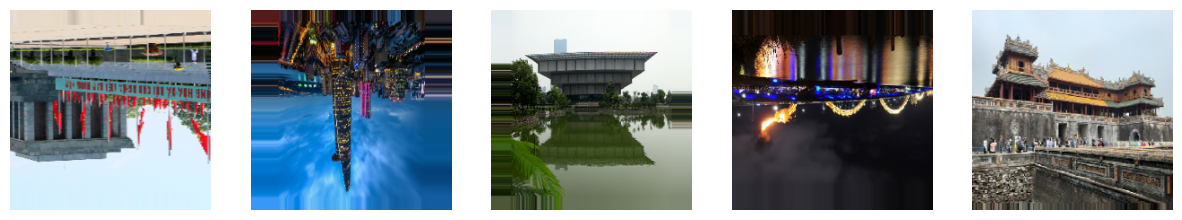

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

for i in range(5):
    image = next(train_ds)[0][0]
    image = np.squeeze(image)
    ax[i].imshow(image)
    ax[i].axis(False)

# Transfer learning

Use Xception pre-trained model.

### Xception

- Disable re-train base pre-trained model
- Add 4 more layers
    - 1 global average pooling layer
    - 1 dense layer
    - 1 dropout layer
    - Output layer

In [75]:
xcep_base = applications.Xception(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))
xcep_base.trainable = False

inputs = Input(shape=(224, 224, 3))

x = xcep_base(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(number_landmark_classes, activation = 'sigmoid')(x)
xcep_model = Model(inputs, outputs)

In [76]:
xcep_model.compile(
    optimizer=keras.optimizers.Adam(),
    loss= keras.losses.CategoricalCrossentropy(from_logits = True),
    metrics= [keras.metrics.CategoricalAccuracy()],
)

In [77]:
epochs = 25
xcep_model.fit(train_ds, epochs=epochs, validation_data=val_ds)

Epoch 1/25


/Users/tung/dev/tung/envs/ai/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2023-04-27 23:07:25.408627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - ETA: 0s - loss: 2.6559 - categorical_accuracy: 0.2775

/Users/tung/dev/tung/envs/ai/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
2023-04-27 23:08:06.705618: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 53s 3s/step - loss: 2.6559 - categorical_accuracy: 0.2775 - val_loss: 1.5253 - val_categorical_accuracy: 0.6467
Epoch 2/25
19/19 [==============================] - 48s 2s/step - loss: 1.2847 - categorical_accuracy: 0.6400 - val_loss: 1.0107 - val_categorical_accuracy: 0.7167
Epoch 3/25
19/19 [==============================] - 48s 2s/step - loss: 0.9244 - categorical_accuracy: 0.7392 - val_loss: 0.8168 - val_categorical_accuracy: 0.7867
Epoch 4/25
19/19 [==============================] - 49s 3s/step - loss: 0.7524 - categorical_accuracy: 0.7792 - val_loss: 0.7543 - val_categorical_accuracy: 0.7933
Epoch 5/25
19/19 [==============================] - 47s 2s/step - loss: 0.6486 - categorical_accuracy: 0.8125 - val_loss: 0.7423 - val_categorical_accuracy: 0.7900
Epoch 6/25
19/19 [==============================] - 48s 2s/step - loss: 0.5857 - categorical_accuracy: 0.8308 - val_loss: 0.6380 - val_categorical_accuracy: 0.8000
Epoch 7/25
19/19 [=========

In [78]:
xcep_model.save('./models/cnn2.hdf5')

# Testing Model

This function preprocesses the image so that it can be fed into the trained models. 

In [79]:
def predictor(img, model):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.array(image, dtype = 'float32')/255.0
    plt.imshow(image)
    image = image.reshape(1, 224, 224, 3)
    
    label_names = train_ds.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print('The given image is of \nClass: {0} \nLand: {1}'.format(clas, name))

2023-04-28 09:16:56.486857: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step
The given image is of 
Class: 11 
Land: hon_chong_nhatrang


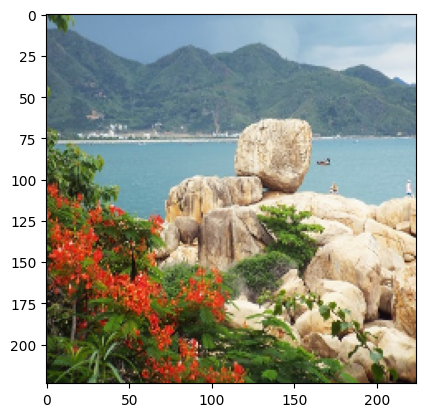

In [80]:
predictor(testset_path + '/hon_chong_nhatrang/498d0725c6e56753.jpg', xcep_model)

# Loading model

Use the following code to load a saved model.

In [81]:
modelSaved = keras.models.load_model('./models/cnn2.hdf5')

In [82]:
def pre_process_image(path_of_file):
    image = cv2.imread(path_of_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.array(image, dtype = 'float32')/255.0
    image = image.reshape(1, 224, 224, 3)

    return image


def make_test_dataset(path):
    total = 0
    correct_count = 0

    for folder in tqdm(os.listdir(path)):
        for file in (os.listdir(os.path.join(path, folder))):
            path_of_file = os.path.join(os.path.join(path, folder), file)
            image = pre_process_image(path_of_file)
            
            dict_class = dict(zip(list(range(len(label_names))), label_names))
            clas = modelSaved.predict(image, verbose=None).argmax()
            name = dict_class[clas]
            
            total += 1
            if name == folder:
                correct_count += 1
    
    return total, correct_count

total, correct_count = make_test_dataset(testset_path)

  0%|                                                                                                                                                                                       | 0/30 [00:00<?, ?it/s]2023-04-28 09:17:18.881713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
libpng warning: iCCP: known incorrect sRGB profile
  3%|█████▊                                                                                                                                                                         | 1/30 [00:04<01:59,  4.11s/it]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning:

In [2]:
print('\nTotal: {0}'.format(total))
print('\nTest accuracy: {}'.format(correct_count * 100.0 / total))


Total: 1500

Test accuracy: 87.4
